<a href="https://colab.research.google.com/github/yashkakrecha/FakeNewsPrediction/blob/main/FakeNewsPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
#importing datasets
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv/train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#dropping NA values and extracting rows
data = data.dropna()

In [ ]:
x = data[['title']]
x.head()

,title
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...


In [ ]:
y = data[['label']]
y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [ ]:
xm = x.iloc[:,:].values
xm[0]

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'],
      dtype=object)

In [ ]:
ym = y.iloc[:,:].values
ym[0]

array([1])

In [ ]:
#vectorizung the value
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50000)
mat = cv.fit_transform(xm[:,0]).todense()

In [ ]:
mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mat,ym,test_size=0.2,random_state=22)

In [ ]:
#Building Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
#plotting confusion matrix to check accuracy
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
confusion_matrix(y_test,y_pred)

accuracy:   0.914


array([[1837,  201],
       [ 114, 1505]])

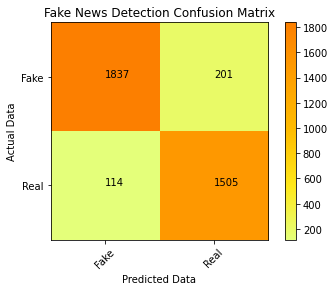

In [ ]:
#plotting confusion matrix to understand properly
import matplotlib.pylab as plt
plt.clf()
cm = confusion_matrix(y_test,y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Fake','Real']
plt.title('Fake News Detection Confusion Matrix')
plt.ylabel('Actual Data')
plt.xlabel('Predicted Data')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i][j]))
plt.colorbar()
plt.show()